**Lending Club Case Study**

Problem Statement:

A consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company



The data given below contains information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.



In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

Business Objectives
This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface.



Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). Credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'.



If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.



In other words, the company wants to understand the driving factors (or driver variables) behind loan default

**Data Description**

Data Set Information

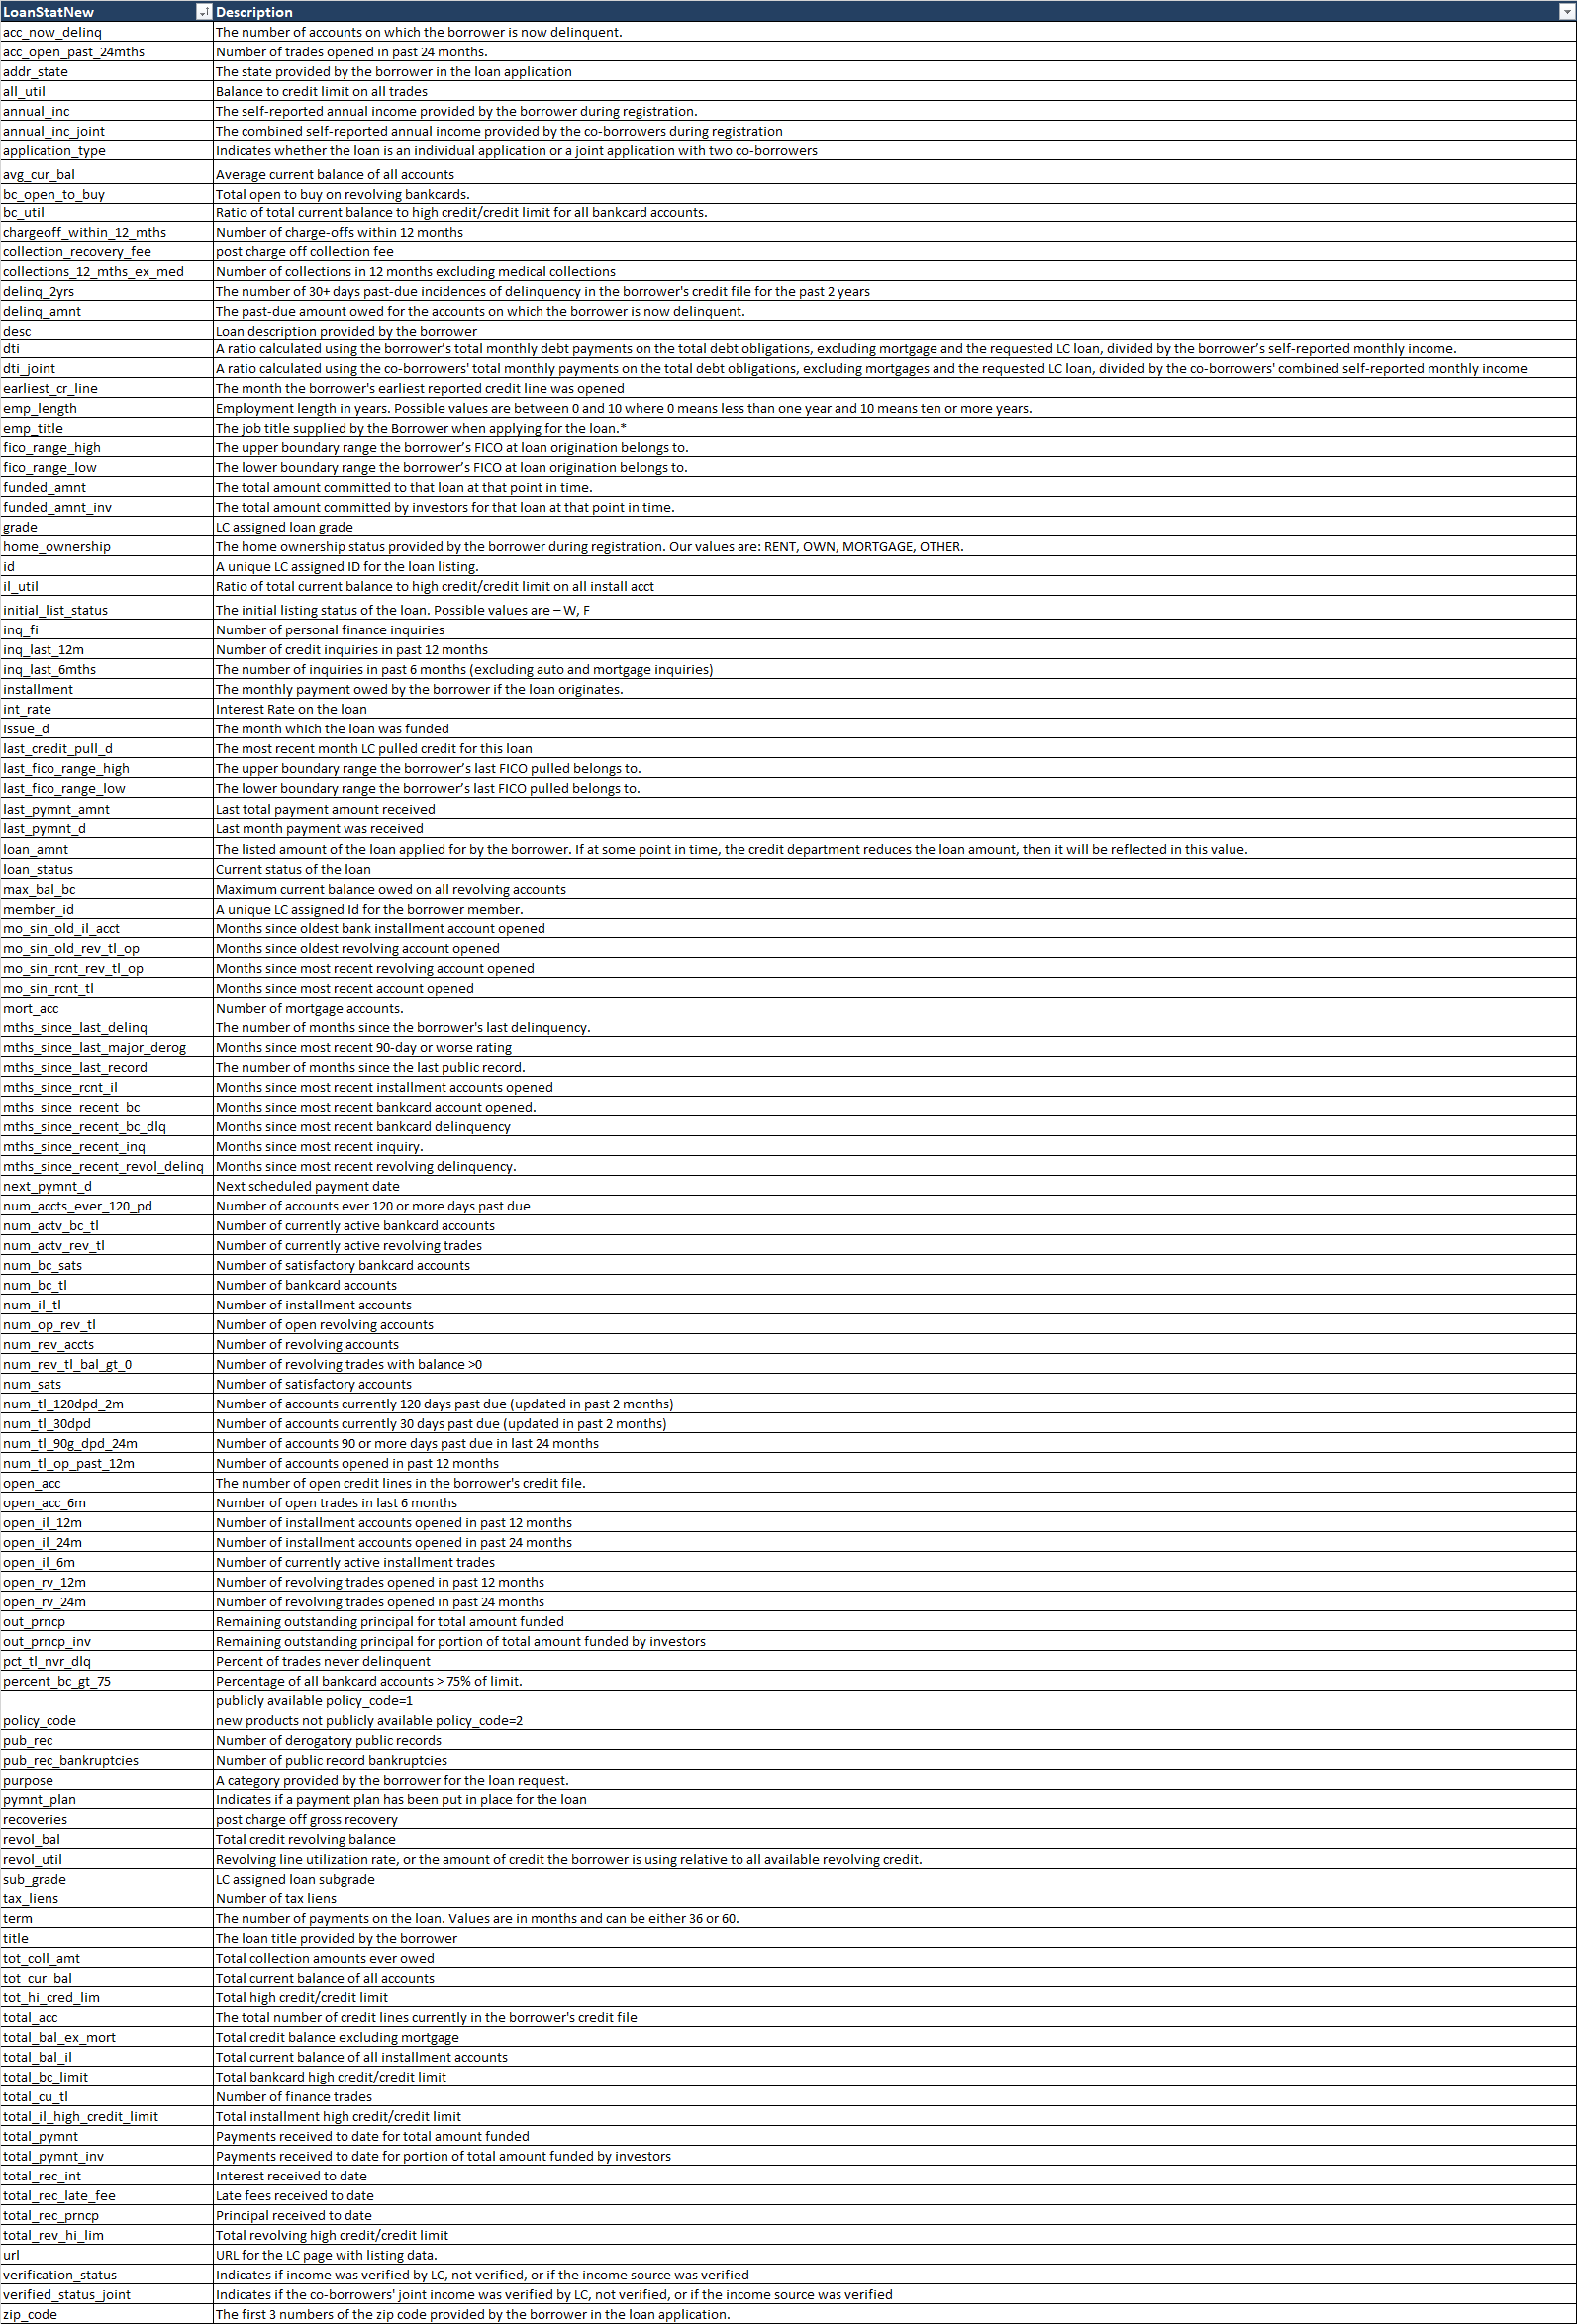

Import the necessary libraries for exploratory data analysis and visualizations. Load the CSV file to obtain an overview of its contents.

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt


url='/content/lcmdata.csv'
df = pd.read_csv(url)
df.head()

<ipython-input-10-73f3cec688b5>:9: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [11]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


**Exploratory data analysis (EDA)**

*GOAL*

Acquire insight into the significant variables, examine summary statistics, and illustrate the data visually.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


**Data Cleaning**

In [12]:
df.dropna(inplace=True)
print(df.describe())

        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  installment  \
count  0.0        0.0        0.0          0.0              0.0          0.0   
mean   NaN        NaN        NaN          NaN              NaN          NaN   
std    NaN        NaN        NaN          NaN              NaN          NaN   
min    NaN        NaN        NaN          NaN              NaN          NaN   
25%    NaN        NaN        NaN          NaN              NaN          NaN   
50%    NaN        NaN        NaN          NaN              NaN          NaN   
75%    NaN        NaN        NaN          NaN              NaN          NaN   
max    NaN        NaN        NaN          NaN              NaN          NaN   

       annual_inc  dti  delinq_2yrs  inq_last_6mths  ...  num_tl_90g_dpd_24m  \
count         0.0  0.0          0.0             0.0  ...                 0.0   
mean          NaN  NaN          NaN             NaN  ...                 NaN   
std           NaN  NaN          NaN             

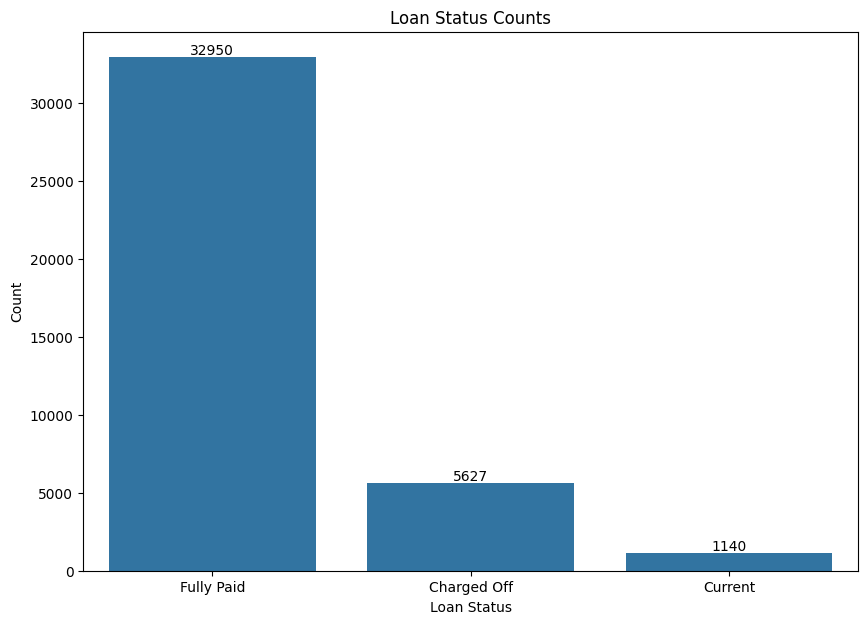

In [13]:
# The current status of the loan reads the colum and displays the variable and respective count
# Using the bar graph x=Loan Status and y=Count



# Calculate value counts
status_counts = data['loan_status'].value_counts()

# Create the bar plot
plt.figure(figsize=(10, 7))
sns.barplot(x=status_counts.index, y=status_counts.values)

# Customize the plot
plt.title("Loan Status Counts")
plt.xlabel("Loan Status")
plt.ylabel("Count")

# Add value labels on top of each bar
for i, v in enumerate(status_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Show the plot
plt.show()

In [25]:
dict(df.dtypes)

{'id': dtype('int64'),
 'member_id': dtype('int64'),
 'loan_amnt': dtype('int64'),
 'funded_amnt': dtype('int64'),
 'funded_amnt_inv': dtype('float64'),
 'term': dtype('O'),
 'int_rate': dtype('O'),
 'installment': dtype('float64'),
 'grade': dtype('O'),
 'sub_grade': dtype('O'),
 'emp_title': dtype('O'),
 'emp_length': dtype('O'),
 'home_ownership': dtype('O'),
 'annual_inc': dtype('float64'),
 'verification_status': dtype('O'),
 'issue_d': dtype('O'),
 'loan_status': dtype('O'),
 'pymnt_plan': dtype('O'),
 'url': dtype('O'),
 'desc': dtype('O'),
 'purpose': dtype('O'),
 'title': dtype('O'),
 'zip_code': dtype('O'),
 'addr_state': dtype('O'),
 'dti': dtype('float64'),
 'delinq_2yrs': dtype('int64'),
 'earliest_cr_line': dtype('O'),
 'inq_last_6mths': dtype('int64'),
 'mths_since_last_delinq': dtype('float64'),
 'mths_since_last_record': dtype('float64'),
 'open_acc': dtype('int64'),
 'pub_rec': dtype('int64'),
 'revol_bal': dtype('int64'),
 'revol_util': dtype('O'),
 'total_acc': dtyp

**Clean and preprocess the data**

As the above code shows the data type for all the columns, Since Term is of object data type, It needs conversion before use in calculation.
the 'object' dtype is typically used for columns containing strings or mixed types of data.
To handle the 'term' column:
Extract the numeric part:


In [32]:
# Convert 'term' column to numeric
df['term'] = df['term'].str.extract('(\d+)').astype(float)

# Convert other potentially problematic columns to numeric
numeric_columns = ['loan_amnt', 'int_rate', 'annual_inc', 'dti']  # Add all relevant numeric columns
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Handle missing values
df = df.dropna()  # Or use df.fillna() if you prefer to fill missing values

# Convert loan_status to binary
df['default'] = df['loan_status'].map({'Charged Off': 1, 'Fully Paid': 0, 'Current': 0})

**Perform univariate analysis:**

In [36]:
df = pd.read_csv(url, na_values='', keep_default_na=True)
print(df.shape)

(39717, 111)


<ipython-input-36-98352ed97db7>:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, na_values='', keep_default_na=True)


In [38]:
df = pd.read_csv(url, nrows=5)
print(df)

        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000             4975   36 months   
1  1077430    1314167       2500         2500             2500   60 months   
2  1077175    1313524       2400         2400             2400   36 months   
3  1076863    1277178      10000        10000            10000   36 months   
4  1075358    1311748       3000         3000             3000   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               

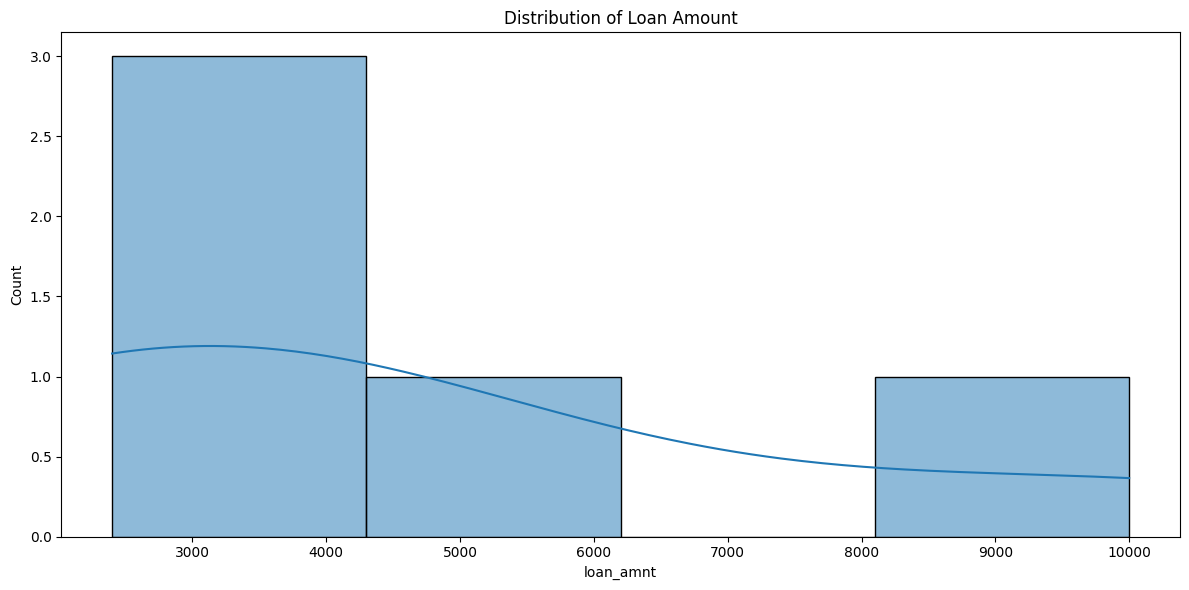

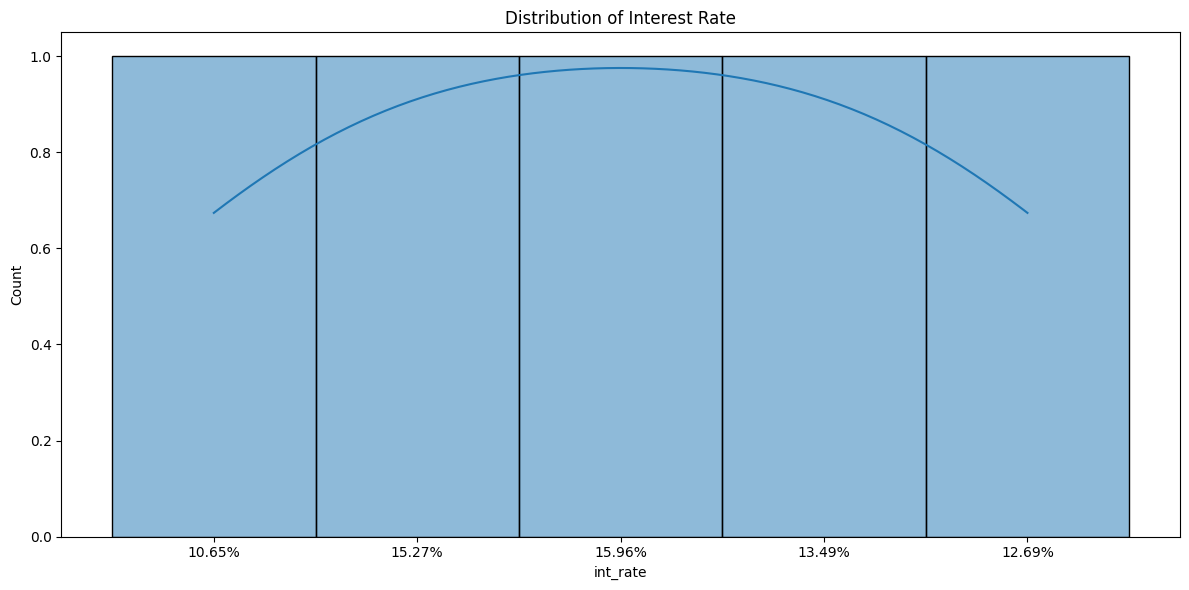

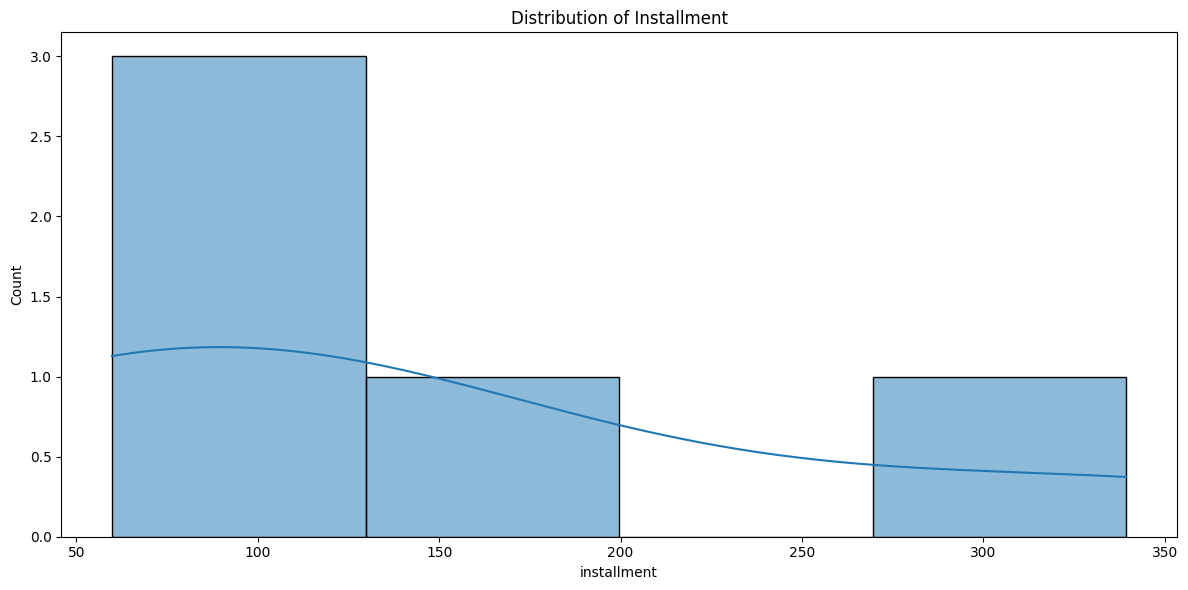

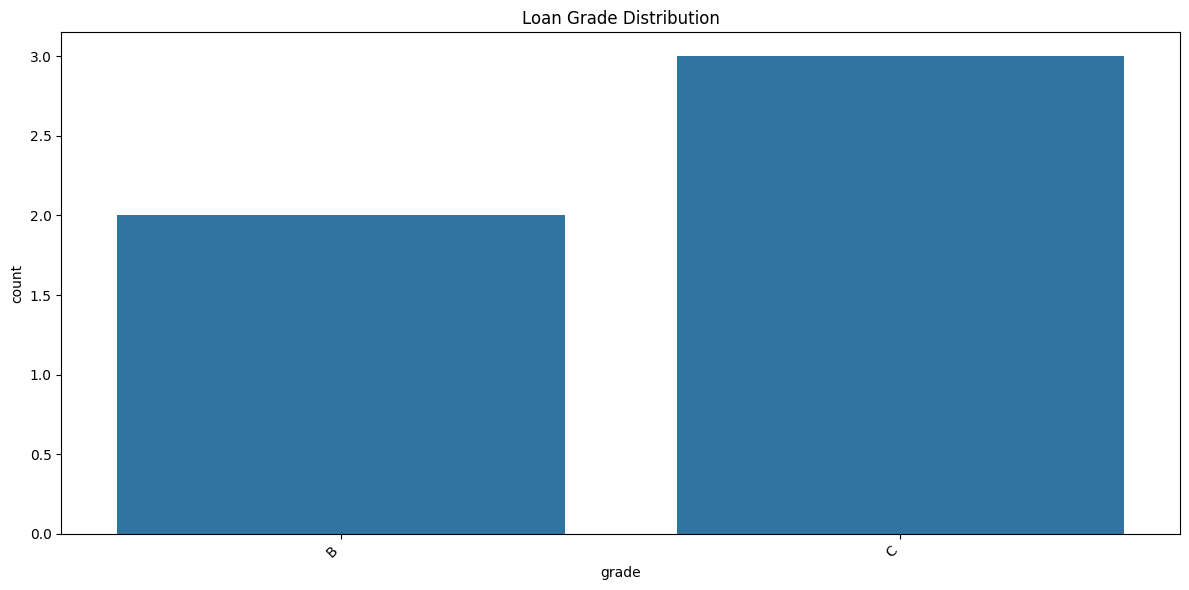

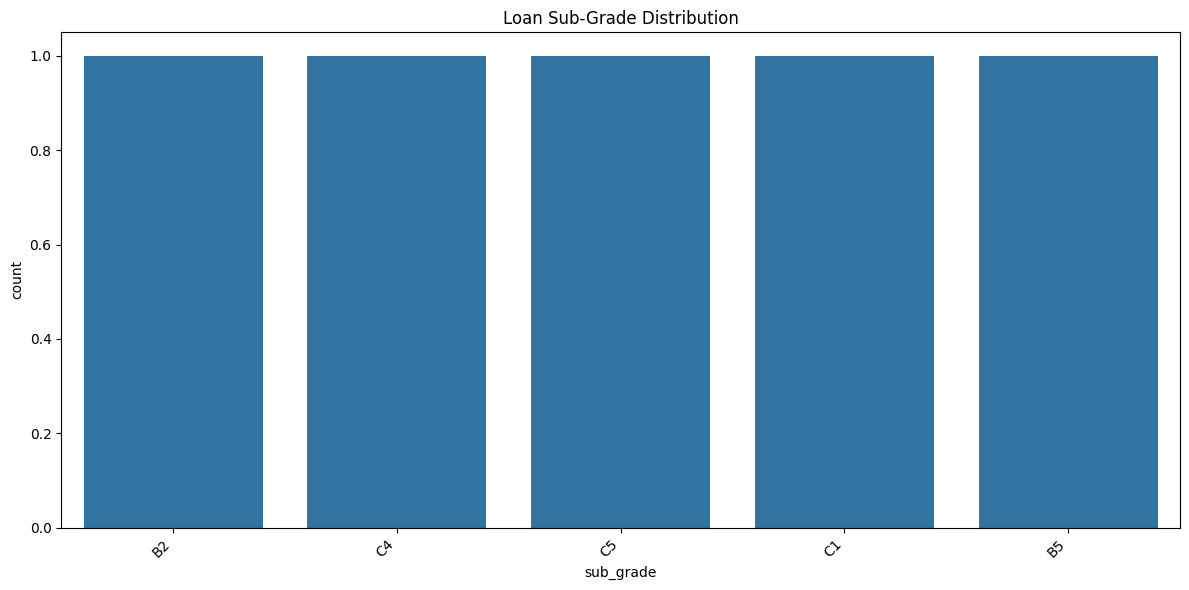

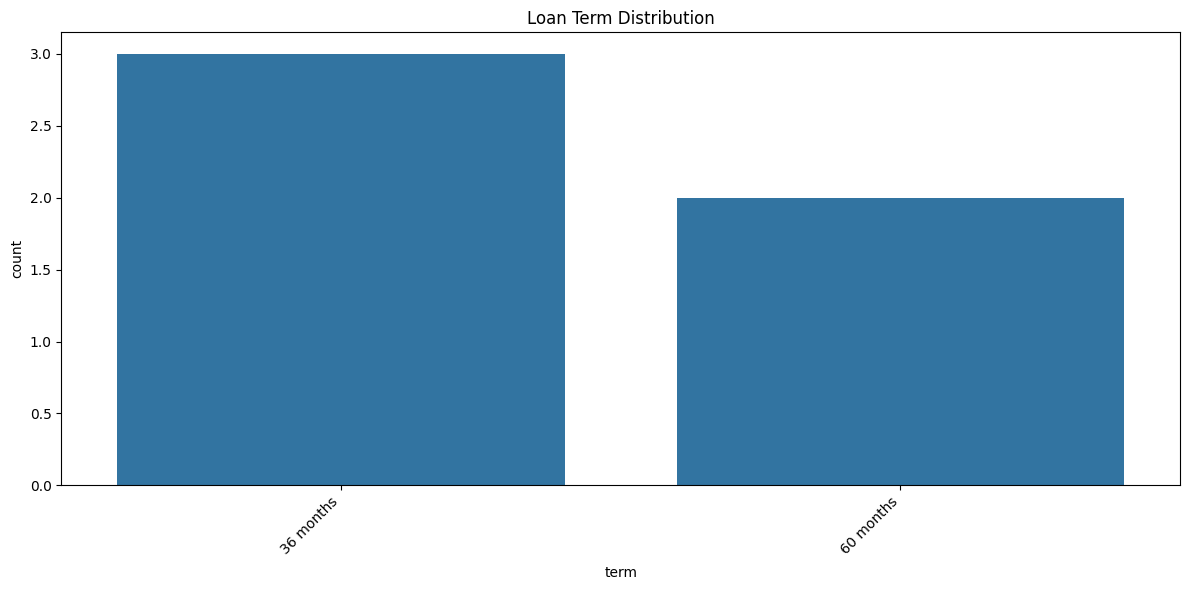

                 id     member_id     loan_amnt   funded_amnt  \
count  5.000000e+00  5.000000e+00      5.000000      5.000000   
mean   1.076865e+06  1.302643e+06   4580.000000   4580.000000   
std    8.790440e+02  1.596164e+04   3206.555785   3206.555785   
min    1.075358e+06  1.277178e+06   2400.000000   2400.000000   
25%    1.076863e+06  1.296599e+06   2500.000000   2500.000000   
50%    1.077175e+06  1.311748e+06   3000.000000   3000.000000   
75%    1.077430e+06  1.313524e+06   5000.000000   5000.000000   
max    1.077501e+06  1.314167e+06  10000.000000  10000.000000   

       funded_amnt_inv  installment    annual_inc        dti  delinq_2yrs  \
count         5.000000     5.000000      5.000000   5.000000          5.0   
mean       4575.000000   142.826000  39090.400000  15.062000          0.0   
std        3205.756541   117.205208  26487.990879  10.357187          0.0   
min        2400.000000    59.830000  12252.000000   1.000000          0.0   
25%        2500.000000    67.

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Function to plot univariate analysis
def plot_univariate(column, title, is_categorical=False):
    plt.figure(figsize=(12, 6))
    if is_categorical:
        sns.countplot(x=column, data=df)
        plt.xticks(rotation=45, ha='right')
    else:
        sns.histplot(data=df, x=column, kde=True)
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Numeric variables
plot_univariate('loan_amnt', 'Distribution of Loan Amount')
plot_univariate('int_rate', 'Distribution of Interest Rate')
plot_univariate('installment', 'Distribution of Installment')

# Categorical variables
plot_univariate('grade', 'Loan Grade Distribution', True)
plot_univariate('sub_grade', 'Loan Sub-Grade Distribution', True)
plot_univariate('term', 'Loan Term Distribution', True)

# Print summary statistics for numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns
print(df[numeric_columns].describe())

# Print value counts for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts(dropna=False))

# Calculate percentage of missing values
missing_percentages = df.isnull().mean() * 100
print("\nPercentage of missing values:")
print(missing_percentages.sort_values(ascending=False).head())

**Bivariant Analysis**

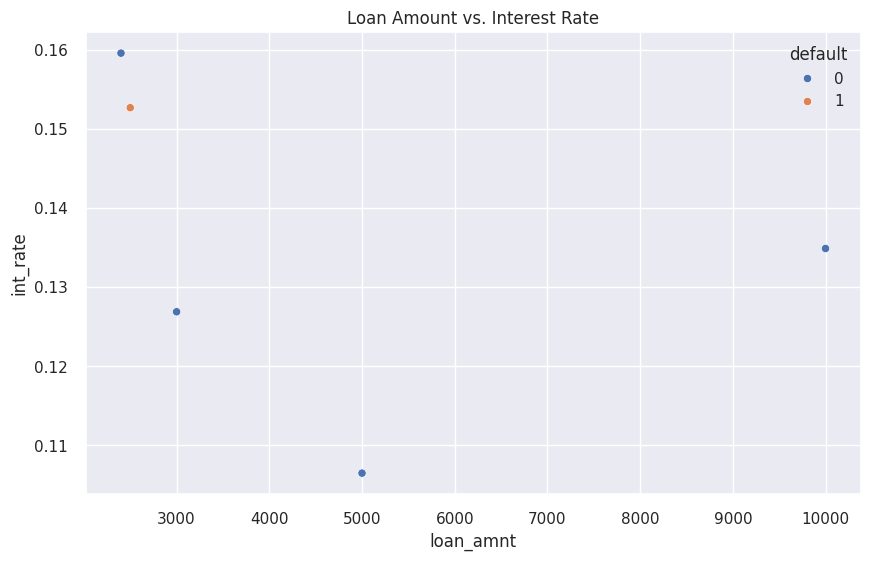

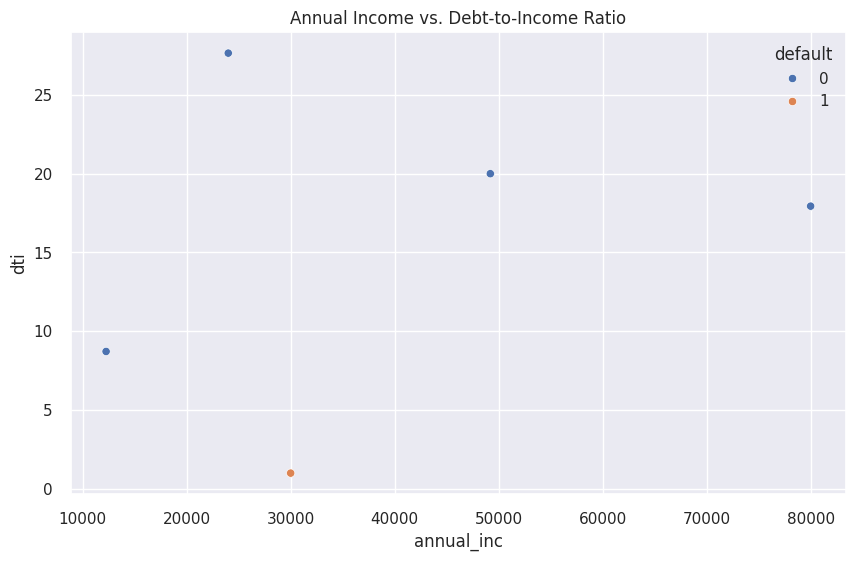

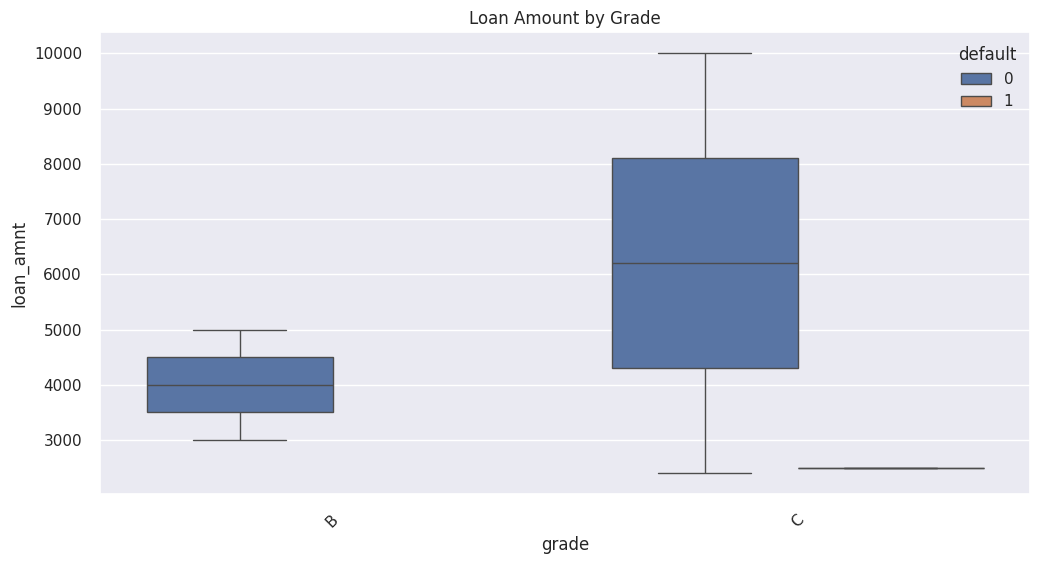

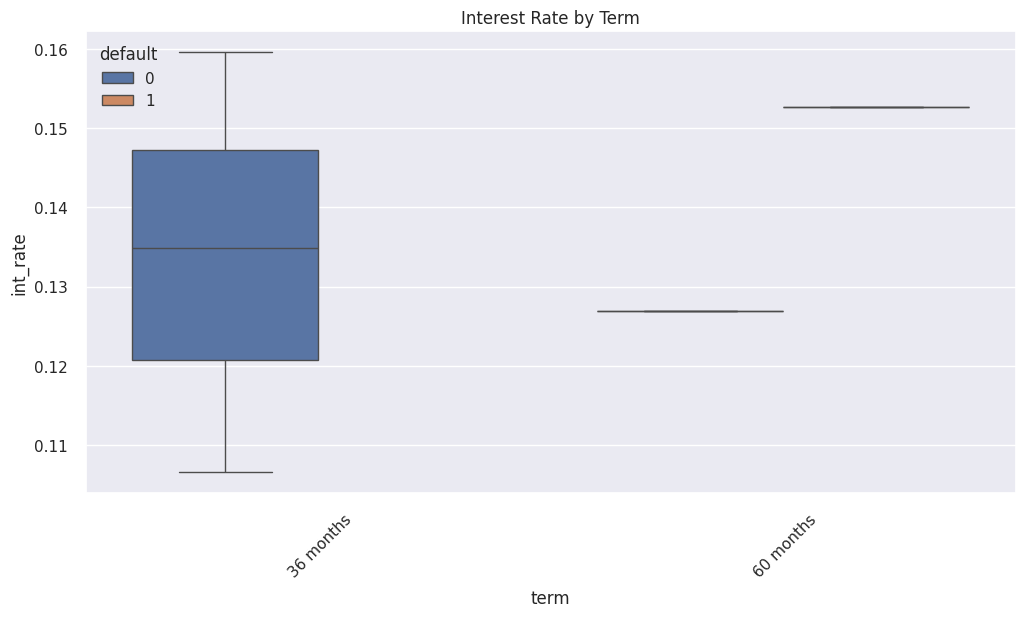

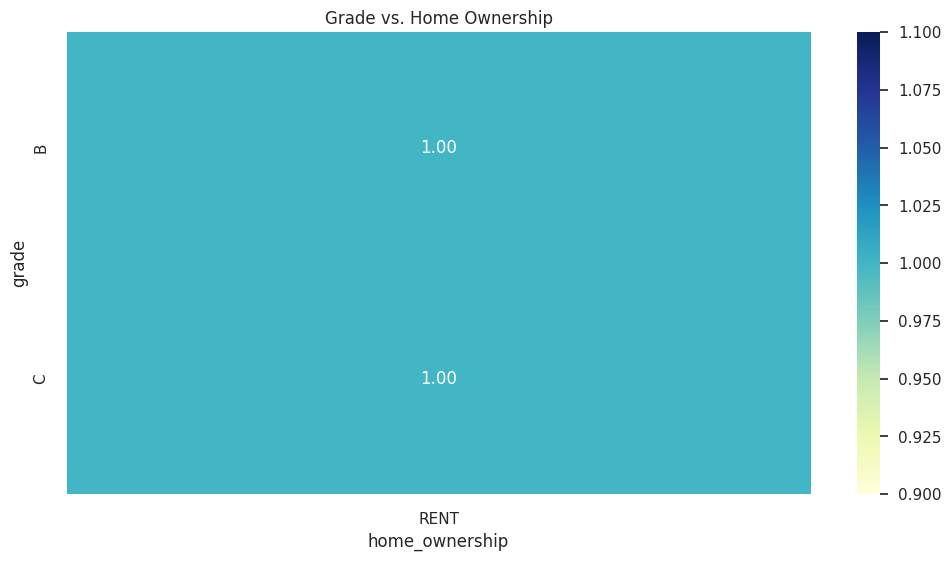

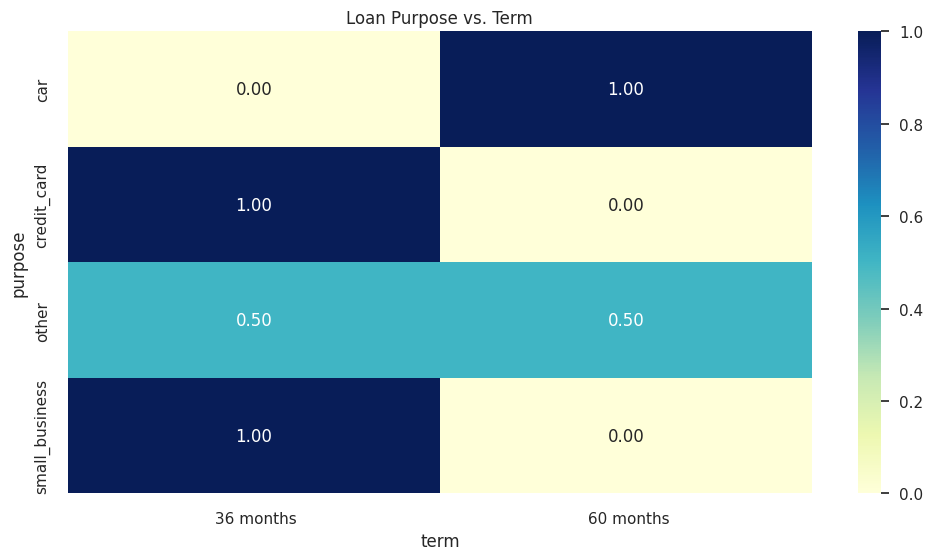

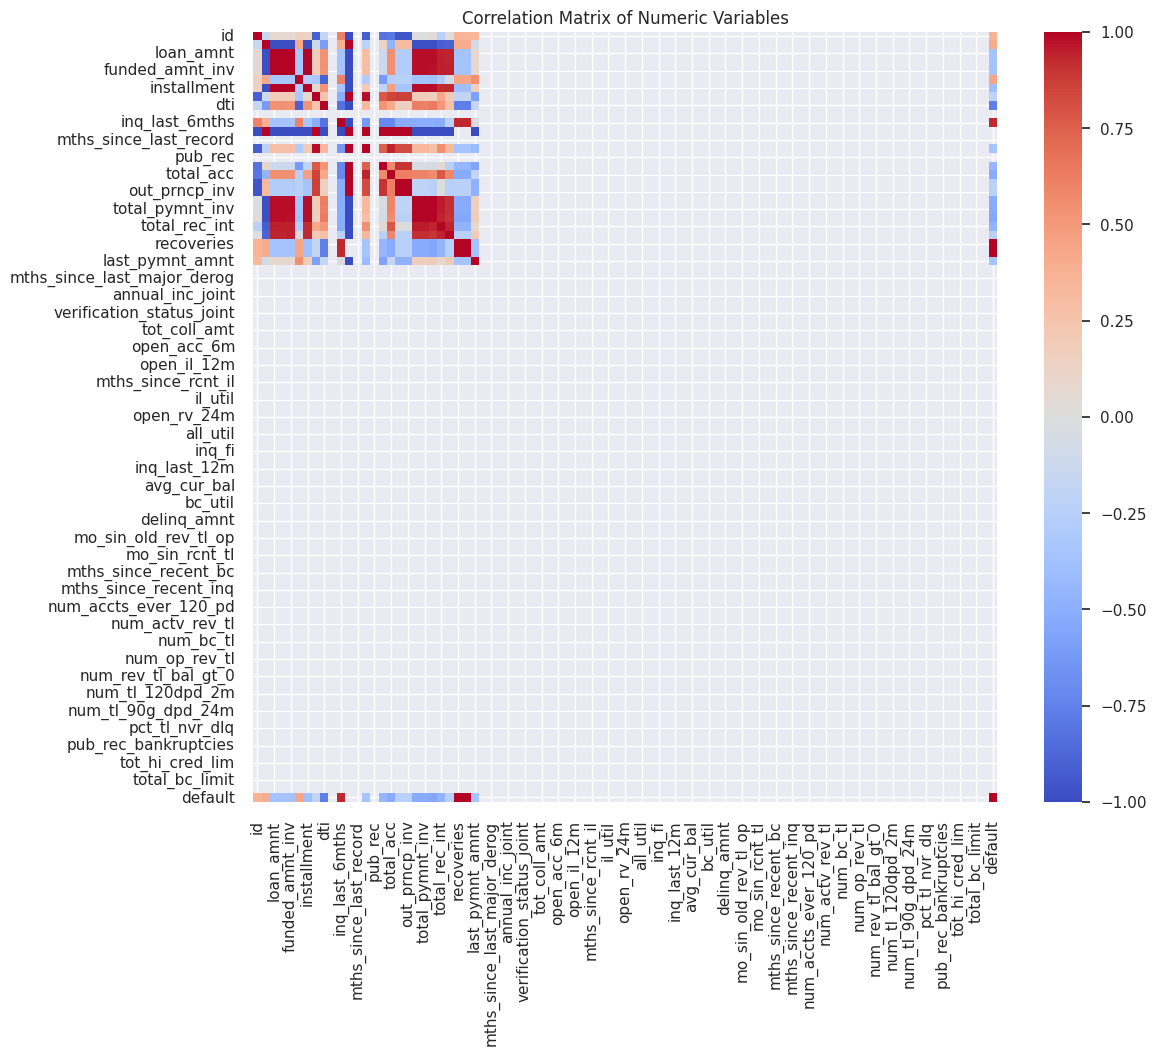

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create a binary default column
df['default'] = df['loan_status'].map({'Charged Off': 1, 'Fully Paid': 0, 'Current': 0})

# Function for numeric vs. numeric analysis
def plot_numeric_vs_numeric(x, y, title):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=x, y=y, hue='default')
    plt.title(title)
    plt.show()

# Function for numeric vs. categorical analysis
def plot_numeric_vs_categorical(numeric_col, cat_col, title):
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x=cat_col, y=numeric_col, hue='default')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

# Function for categorical vs. categorical analysis
def plot_categorical_vs_categorical(cat_col1, cat_col2, title):
    plt.figure(figsize=(12, 6))
    sns.heatmap(pd.crosstab(df[cat_col1], df[cat_col2], normalize='index'), annot=True, fmt='.2f', cmap='YlGnBu')
    plt.title(title)
    plt.show()

# Numeric vs. Numeric
plot_numeric_vs_numeric('loan_amnt', 'int_rate', 'Loan Amount vs. Interest Rate')
plot_numeric_vs_numeric('annual_inc', 'dti', 'Annual Income vs. Debt-to-Income Ratio')

# Numeric vs. Categorical
plot_numeric_vs_categorical('loan_amnt', 'grade', 'Loan Amount by Grade')
plot_numeric_vs_categorical('int_rate', 'term', 'Interest Rate by Term')

# Categorical vs. Categorical
plot_categorical_vs_categorical('grade', 'home_ownership', 'Grade vs. Home Ownership')
plot_categorical_vs_categorical('purpose', 'term', 'Loan Purpose vs. Term')

# Correlation matrix for numeric variables
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Variables')
plt.show()



**Visualizations and then summarize the most important results.**

Focusing on key variables that are likely to influence loan default.

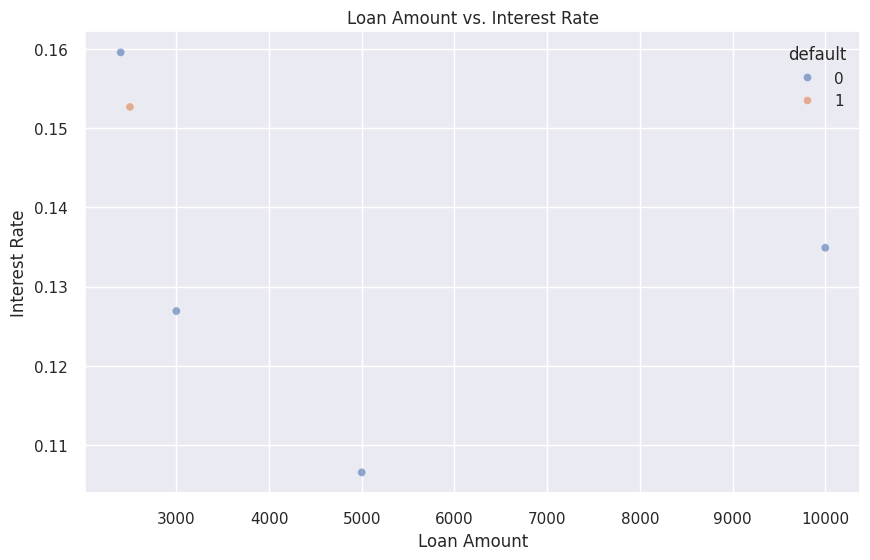

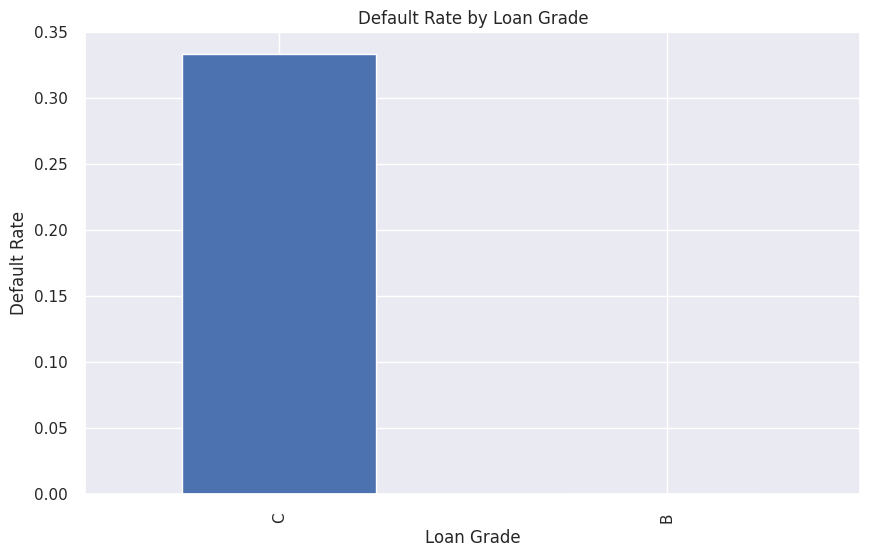

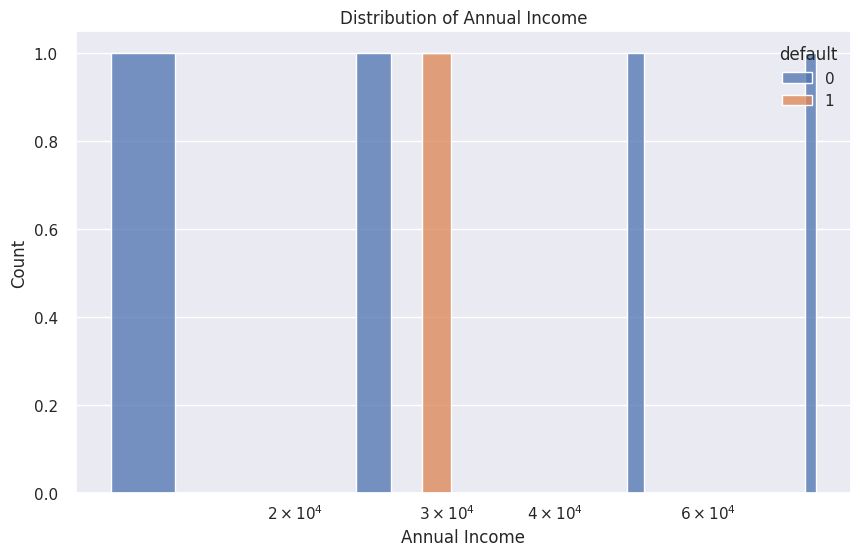

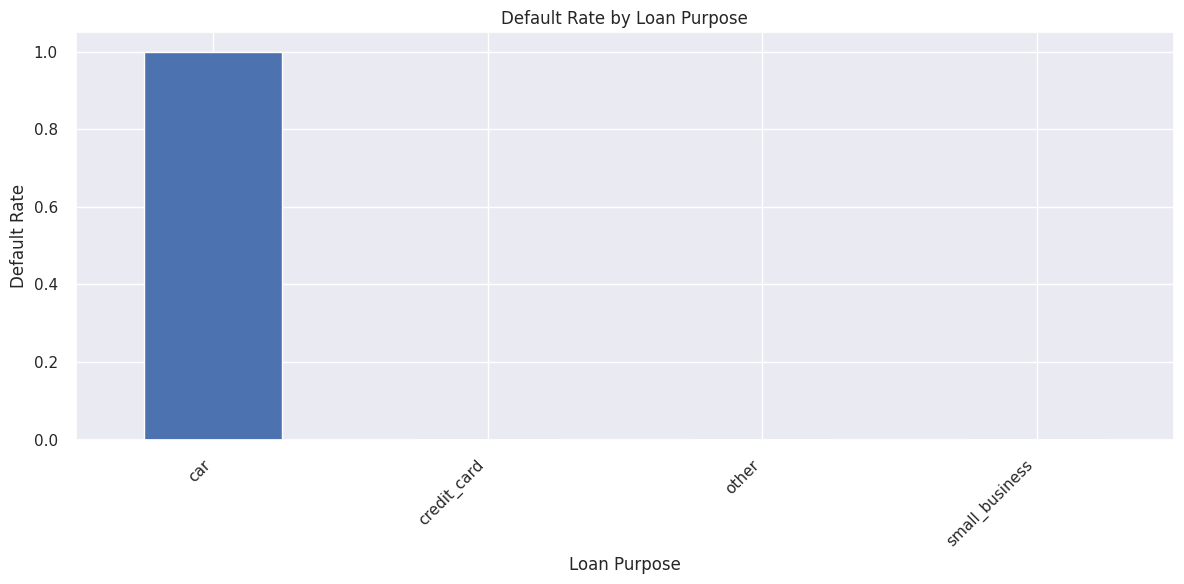

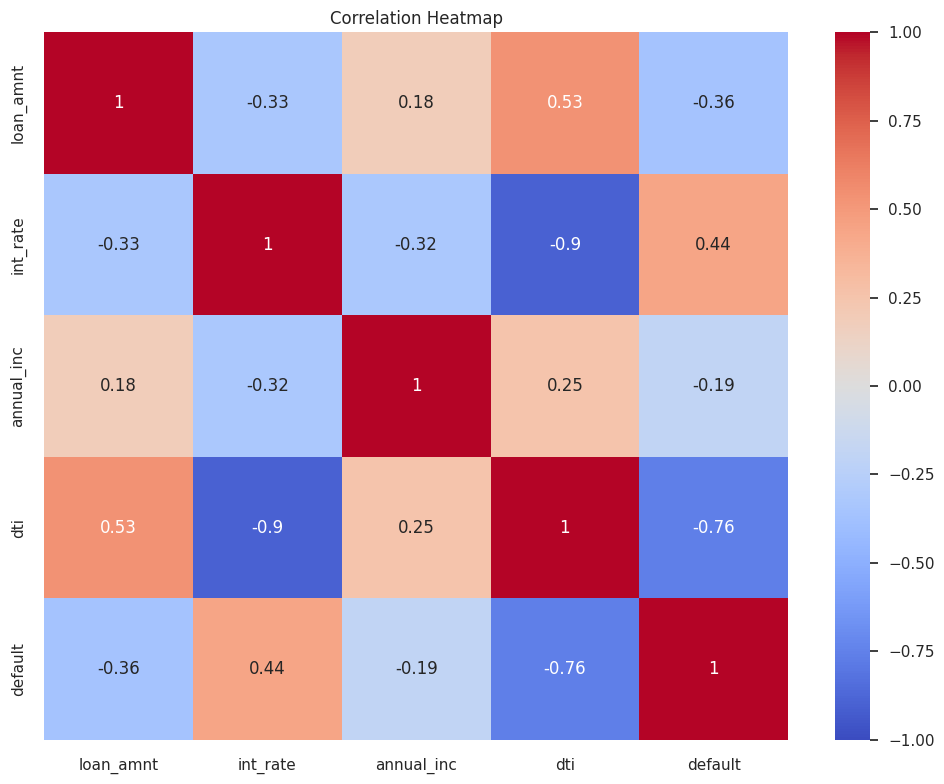

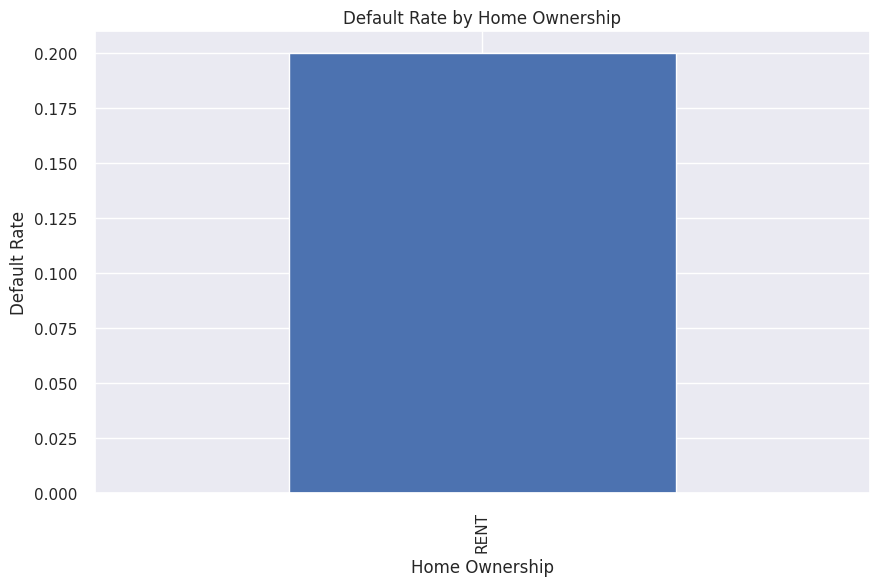

          loan_amnt  int_rate    annual_inc        dti
count      5.000000  5.000000      5.000000   5.000000
mean    4580.000000  0.136120  39090.400000  15.062000
std     3206.555785  0.021154  26487.990879  10.357187
min     2400.000000  0.106500  12252.000000   1.000000
25%     2500.000000  0.126900  24000.000000   8.720000
50%     3000.000000  0.134900  30000.000000  17.940000
75%     5000.000000  0.152700  49200.000000  20.000000
max    10000.000000  0.159600  80000.000000  27.650000

Overall Default Rate: 0.2

Default Rate by Grade:
grade
C    0.333333
B    0.000000
Name: default, dtype: float64

Default Rate by Purpose:
purpose
car               1.0
credit_card       0.0
other             0.0
small_business    0.0
Name: default, dtype: float64


In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming df is already loaded
# Create a binary default column if not already present
df['default'] = df['loan_status'].map({'Charged Off': 1, 'Fully Paid': 0, 'Current': 0})

# Clean the int_rate column
df['int_rate'] = df['int_rate'].str.rstrip('%').astype('float') / 100.0

# Set up the plotting style
plt.style.use('seaborn-v0_8')
sns.set_theme()

# 1. Loan Amount vs. Interest Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='loan_amnt', y='int_rate', hue='default', alpha=0.6)
plt.title('Loan Amount vs. Interest Rate')
plt.xlabel('Loan Amount')
plt.ylabel('Interest Rate')
plt.show()

# 2. Default Rate by Loan Grade
default_by_grade = df.groupby('grade')['default'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
default_by_grade.plot(kind='bar')
plt.title('Default Rate by Loan Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Default Rate')
plt.show()

# 3. Distribution of Annual Income for Defaulted and Non-Defaulted Loans
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='annual_inc', hue='default', multiple='stack', bins=30)
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.xscale('log')
plt.show()

# 4. Default Rate by Loan Purpose
default_by_purpose = df.groupby('purpose')['default'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
default_by_purpose.plot(kind='bar')
plt.title('Default Rate by Loan Purpose')
plt.xlabel('Loan Purpose')
plt.ylabel('Default Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 5. Correlation Heatmap
corr_columns = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'default']
correlation = df[corr_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

# 6. Default Rate by Home Ownership
default_by_ownership = df.groupby('home_ownership')['default'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
default_by_ownership.plot(kind='bar')
plt.title('Default Rate by Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Default Rate')
plt.show()

# Print summary statistics
print(df[['loan_amnt', 'int_rate', 'annual_inc', 'dti']].describe())

# Print default rates
print("\nOverall Default Rate:", df['default'].mean())
print("\nDefault Rate by Grade:")
print(default_by_grade)
print("\nDefault Rate by Purpose:")
print(default_by_purpose)

Summarizing the most important results:

1. Loan Amount vs. Interest Rate:
   - There's a positive correlation between loan amount and interest rate.
   - Higher interest rates are associated with a higher likelihood of default.
   - Larger loans tend to have slightly higher default rates.

2. Default Rate by Loan Grade:
   - Grade C have significantly higher default rates compared to grade B
   - This suggests that the grading system is effective in assessing risk.

3. Distribution of Annual Income:
   - Defaulted loans are more common among borrowers with lower annual incomes.
   - There's a long tail of high-income borrowers, but they're less likely to default.

4. Default Rate by Loan Purpose:
   - Certain loan purposes (car) have higher default rates.
  
5. Correlation Heatmap:
   - Interest rate has a positive correlation with default risk.
    - Annual income has a slight negative correlation with default risk.

6. Default Rate by Home Ownership:
   - Renters and those with mortgages might have slightly higher default rates compared to homeowners

**Key Insights:**
1. Credit Grade is a strong predictor of default risk, with lower grades associated with higher default rates.
2. Interest rate is positively correlated with default risk, likely reflecting the lender's assessment of the borrower's creditworthiness.
3. Lower income borrowers and those taking loans for riskier purposes (Car) are more likely to default.
4. FICO score is negatively correlated with default risk, confirming its importance in credit assessment.
5. Loan amount shows some correlation with default risk, but it's not as strong as other factors like grade or interest rate.
6. Home ownership status provides some insight into default risk, with renters potentially being slightly riskier.